# calculate prototype correlations with mean expression profile of cell types

In [2]:
from interpretable_ssl.trainers.scpoli_trainer import *


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)
 captum (see https://github.com/pytorch/captum).


In [3]:
st = ScpoliTrainer()


loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## calculate mean expression profile of each cell type

In [9]:
import numpy as np
train_adata = st.ref.adata
cell_types = train_adata.obs.cell_type.cat.categories
cell_type_means = [train_adata[train_adata.obs.cell_type == cell_type].X.mean(0) for cell_type in cell_types]
cell_type_means = np.array(cell_type_means).reshape(-1, 4000)
cell_type_means.shape

(16, 4000)

In [53]:
cell_type_means.shape

(16, 4000)

In [65]:
mean_centered = cell_type_means - cell_type_means.mean(axis=0)

## calculate prototype cells

In [11]:
st.latent_dims = 5
model = st.load_model()
prot_cells = model.decode_prototypes_using_closest_cell(train_adata)
prot_cells.shape

Embedding dictionary:
 	Num conditions: [3]
 	Embedding dim: [10]
Encoder Architecture:
	Input Layer in, out and cond: 4000 64 10
	Mean/Var Layer in/out: 64 5
Decoder Architecture:
	First Layer in, out and cond:  5 64 10
	Output Layer in/out:  64 4000 



/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/scarches/models/scpoli/scpoli_model.py:347: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025845206/work/torch/csrc/utils/tensor_new.cpp:275.)
  c = torch.tensor(label_tensor, device=device).T


(16, 4000)

In [71]:
prot_cells_centered = prot_cells - prot_cells.mean(axis=0)

In [74]:
corr = np.corrcoef(prot_cells_centered, mean_centered)
prot_size = len(prot_cells)
cell_type_cnt = len(cell_type_means)
res = corr[:prot_size, prot_size:]
res.shape, prot_size, cell_type_cnt

((16, 16), 16, 16)

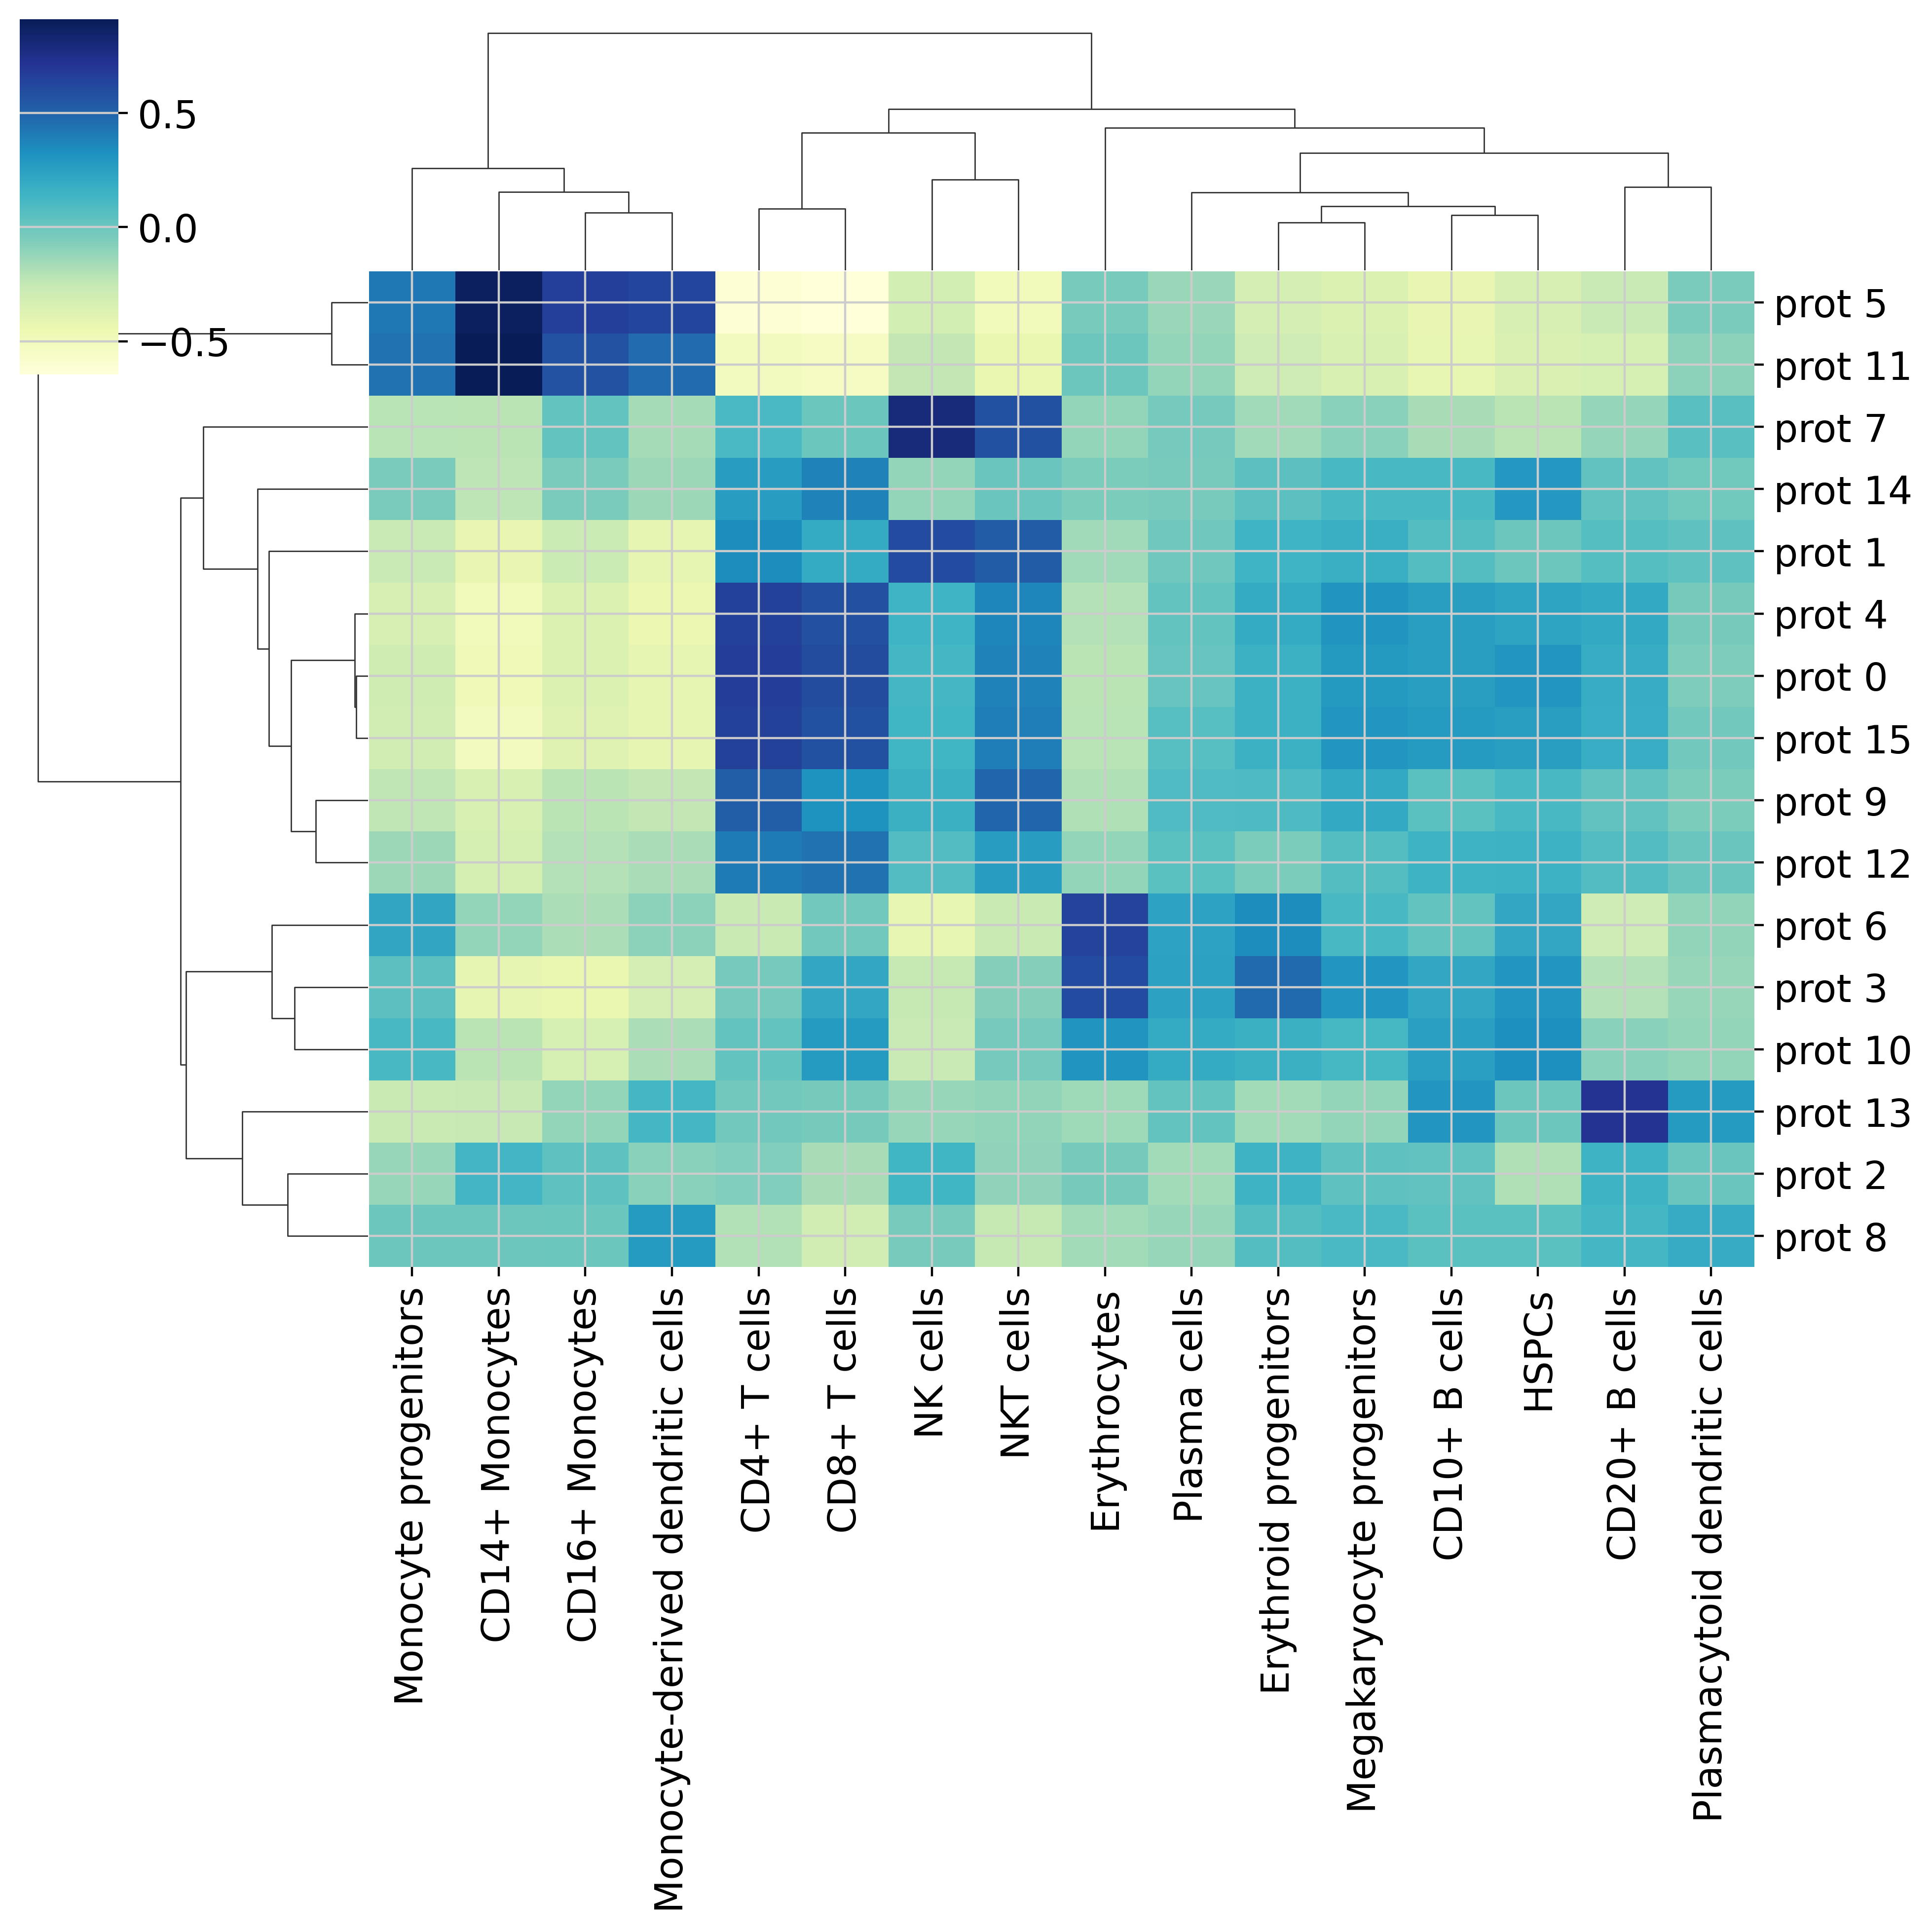

In [75]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(res, index = [f'prot {i}' for i in range(prot_size)])
df.columns = train_adata.obs.cell_type.cat.categories
sns.clustermap(df, cmap="YlGnBu")
